In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq, whiten

In [2]:
df = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/medical/medical_clean.csv')

In [3]:
df = df[['Age', 'Income','Initial_days', 'Zip', 'Additional_charges']]

In [4]:
df.isna().any()

Age                   False
Income                False
Initial_days          False
Zip                   False
Additional_charges    False
dtype: bool

In [5]:
df.describe()

,Age,Income,Initial_days,Zip,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,40490.495160,34.455299,50159.323900,12934.528587
std,20.638538,28521.153293,26.309341,27469.588208,6542.601544
min,18.000000,154.080000,1.001981,610.000000,3125.703000
25%,36.000000,19598.775000,7.896215,27592.000000,7986.487755
50%,53.000000,33768.420000,35.836244,50207.000000,11573.977735
75%,71.000000,54296.402500,61.161020,72411.750000,15626.490000
max,89.000000,207249.100000,71.981490,99929.000000,30566.070000


In [6]:
df.head()

,Age,Income,Initial_days,Zip,Additional_charges
0,53,86575.93,10.585770,35621,17939.403420
1,51,46805.99,15.129562,32446,17612.998120
2,53,14370.14,4.772177,57110,17505.192460
3,78,39741.49,1.714879,56072,12993.437350
4,22,1209.56,1.254807,23181,3716.525786


In [7]:
#Normalize data and store it in a new variable
scaled_data = pd.DataFrame( data = whiten(obs = df, check_finite = True), columns = df.columns)
scaled_data

,Age,Income,Initial_days,Zip,Additional_charges
0,2.568140,3.035651,0.402378,1.296808,2.742074
1,2.471229,1.641179,0.575093,1.181220,2.692183
2,2.568140,0.503867,0.181396,2.079130,2.675704
3,3.779526,1.393474,0.065185,2.041341,1.986073
4,1.066020,0.042411,0.047697,0.843921,0.568079
...,...,...,...,...,...
9995,1.211387,1.611783,1.959905,1.003451,1.364608
9996,4.215626,0.525356,2.610163,0.303624,4.357376
9997,2.180496,2.311306,2.666646,1.353237,2.335764
9998,2.083585,1.041466,2.408273,2.103340,1.189445


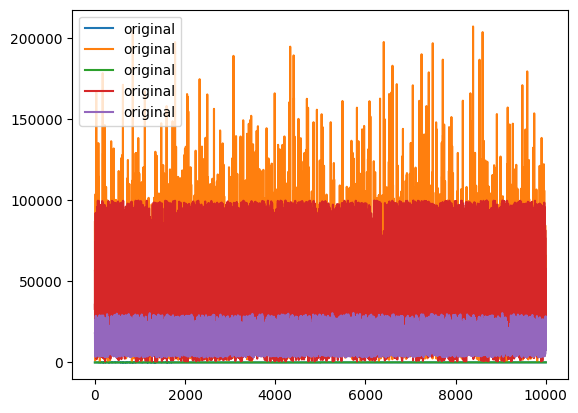

In [8]:
#Plot original data
plt.plot(df, label='original')
plt.legend()
plt.show()


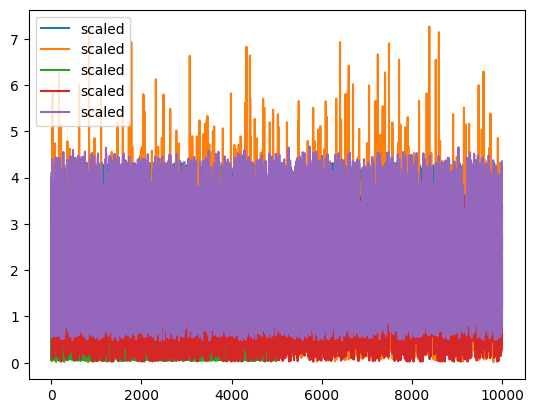

In [9]:
# Plot scaled data
plt.plot(scaled_data, label = 'scaled')
plt.legend()
plt.show()

In [10]:
#Sanity check to make sure the standard deviation is the same, aka the data is normalized
for i in scaled_data.columns:
    print([i, scaled_data[i].std()])

['Age', 1.0000500037503124]
['Income', 1.0000500037503124]
['Initial_days', 1.0000500037503124]
['Zip', 1.0000500037503124]
['Additional_charges', 1.0000500037503124]


In [11]:
scaled_data.describe()

,Age,Income,Initial_days,Zip,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.592934,1.419736,1.309688,1.826086,1.977069
std,1.000050,1.000050,1.000050,1.000050,1.000050
min,0.872198,0.005403,0.038087,0.022207,0.477770
25%,1.744397,0.687201,0.300145,1.004506,1.220751
50%,2.568140,1.184037,1.362179,1.827822,1.769106
75%,3.440338,1.903819,2.324805,2.636202,2.388541
max,4.312537,7.266868,2.736104,3.637987,4.672086


In [12]:
scaled_data.to_csv('E:/HDD Documents/HDD Documents/School/WGU/d212_data_mining_ii/scaled_data.csv')

In [13]:
# Compute cluster centers
kmeans_whiten = kmeans(obs = scaled_data, k_or_guess = 3, iter = 20, check_finite = True)
kmeans_whiten

(array([[1.99216566, 1.44191656, 0.34299726, 1.79267934, 1.40455406],
        [2.04553112, 1.40161133, 2.29023623, 1.85373814, 1.43673815],
        [3.62941508, 1.41624465, 1.28897968, 1.83102505, 2.98174241]]),
 1.7041626489300525)

In [14]:
# Generate cluster centers and labels
centroid_numeric, label_numeric = kmeans_whiten
code_numeric, dist_numeric = vq( obs = scaled_data, code_book = centroid_numeric, check_finite = True)
print(code_numeric)
print(dist_numeric)

[2 0 0 ... 1 1 1]
[2.20854534 1.53458331 1.71338146 ... 1.43045194 0.51820887 2.10387789]


In [15]:
# Find 5 clusters in the data
code_book, distortion = kmeans(scaled_data, 5)
print(code_book)


[[3.49667845 1.21014847 0.34914378 1.80887117 2.82824409]
 [2.47343788 3.53930528 1.20343011 1.93927796 1.75859451]
 [1.81204316 1.14405517 0.34779986 1.79378169 1.28673804]
 [1.78761271 1.1665773  2.27931701 1.84206836 1.27458938]
 [3.47758816 1.21188395 2.27285471 1.80875647 2.75186428]]


In [16]:
#Convert the codebook array to a dataframe for visualization
df_codebook = pd.DataFrame(code_book, columns = ['Age', 'Income', 'Initial_days', 'Zip', 'Additional_charges'])
print(df_codebook)

        Age    Income  Initial_days       Zip  Additional_charges
0  3.496678  1.210148      0.349144  1.808871            2.828244
1  2.473438  3.539305      1.203430  1.939278            1.758595
2  1.812043  1.144055      0.347800  1.793782            1.286738
3  1.787613  1.166577      2.279317  1.842068            1.274589
4  3.477588  1.211884      2.272855  1.808756            2.751864


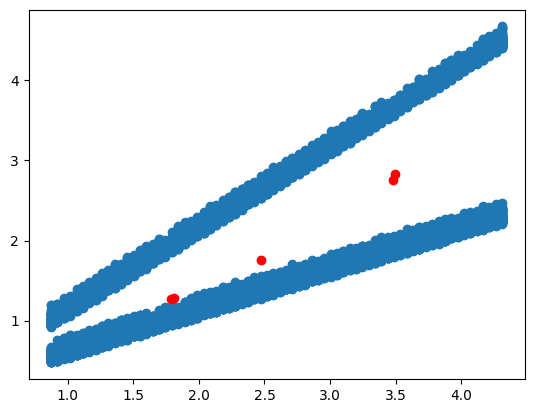

In [17]:
plt.scatter(scaled_data.iloc[:, 0], scaled_data.iloc[:, 4])
plt.scatter(df_codebook.iloc[:, 0], df_codebook.iloc[:, 4], c='r')
plt.show()

In [18]:
#Elbow method: Declaring variables for use
distortions = []
num_cluster = range(1, 10)

In [19]:
#Populating distortions for various clusters
for i in num_cluster:
    centoids, distortion = kmeans(scaled_data, i)
    distortions.append(distortion)

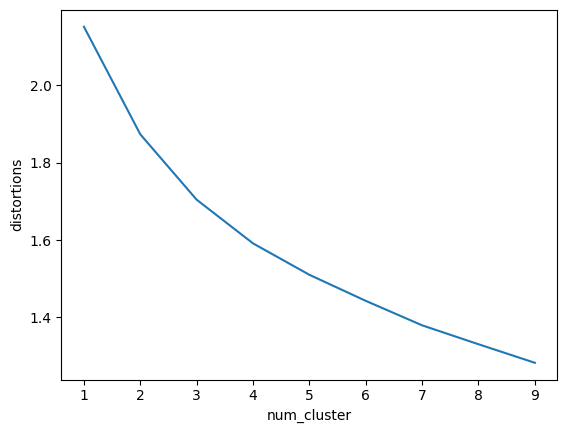

In [20]:
#Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_cluster': num_cluster, 'distortions': distortions})
sns.lineplot(x = 'num_cluster', y = 'distortions', data = elbow_plot_data)
plt.show()